In [1]:
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt

tf.__version__
tf.random.set_seed(44)
np.random.seed(44)

In [2]:
class Dense(tf.Module):
    def __init__(self, input_size, output_size, name=None, activation_function=tf.nn.relu):
        super().__init__(name=name)
        self.activation_function = activation_function
        self.weights = tf.Variable(tf.random.normal([input_size, output_size]), name='weights')
        self.bias = tf.Variable(tf.random.normal([output_size]), name='bias')
    
    @tf.function
    def __call__(self, x):
        y = tf.matmul(x, self.weights) + self.bias
        return self.activation_function(y)

class NeuralNetwork(tf.Module):
    def __init__(self, input_size, layers, name=None):
        super(NeuralNetwork, self).__init__(name=name)
        self.layers = []
        l = 0
        with self.name_scope:
            for size in layers:
                if l == len(layers) - 1:
                    self.layers.append(Dense(input_size=input_size, output_size=size, name=f'dense_{l}', activation_function = tf.nn.sigmoid))
                    break

                self.layers.append(Dense(input_size=input_size, output_size=size, name=f'dense_{l}'))
                input_size = size
                l += 1

    @tf.Module.with_name_scope
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [3]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [4]:
def accuracy(target_y, predicted_y):
    return (100.0 / len(target_y)) * sum(target_y == tf.math.round(predicted_y).numpy())

In [5]:
inputs = np.array([[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]], dtype=np.float32)
expected_output = np.array([[0.0],[1.0],[1.0],[0.0]], dtype=np.float32)

In [6]:
def train(model, x, y, learning_rate):
  with tf.GradientTape(persistent=True) as t:
    predicted_y = model(x)
    current_loss = loss(y, predicted_y)
    for layer in reversed(model.layers):
        dw, db = t.gradient(current_loss, [layer.weights, layer.bias])
        layer.weights.assign_sub(learning_rate * dw)
        layer.bias.assign_sub(learning_rate * db)

In [7]:
model = NeuralNetwork(input_size = 2, layers = [6, 6, 6, 1], name="MyNeuralNetwork")

epochs = range(100)
losses = []
accuracies = []

def training_loop(model, x, y):
  for epoch in epochs:
    train(model, x, y, learning_rate=0.1)
    predicted_y = model(x)
    current_loss = loss(y, predicted_y)
    current_accuracy = accuracy(y, predicted_y)
    accuracies.append(current_accuracy)
    losses.append(current_loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss={current_loss}, accuracy={current_accuracy[0]}%")

In [8]:
training_loop(model, inputs, expected_output)

Epoch 0: loss=0.2728033661842346, accuracy=50.0%


Text(0.5, 0.98, 'Predicting XOR')

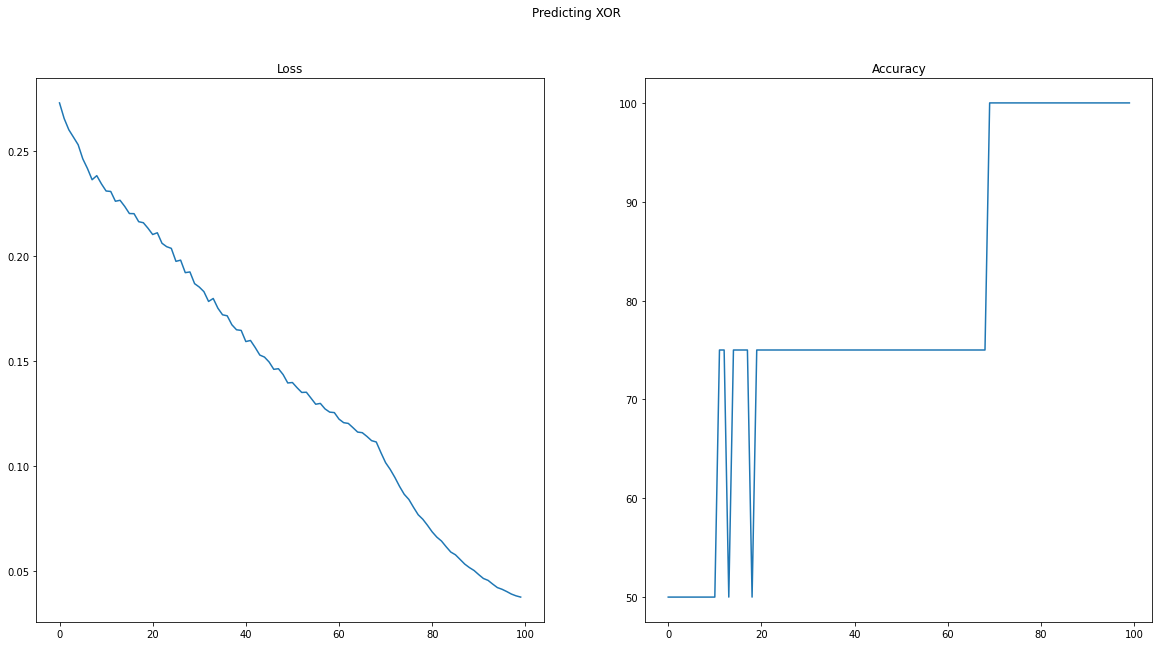

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].plot(losses)
axes[0].set_title('Loss')
axes[1].plot(accuracies)
axes[1].set_title('Accuracy')
fig.suptitle('Predicting XOR')